In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
import torch
import time

sys.path.insert(0,os.path.abspath('/notebooks/4901_revisit_cdtran'))
sys.path.insert(0,os.path.abspath('/notebooks/pytorchtimseries'))
from tqdm.notebook import tqdm


def xy_plot(x, y, pred_y, title=None, y_label=None):
    with plt.style.context(['science', 'notebook']):

        fig, ax = plt.subplots()
        
        x_ticks = np.arange(len(x))
        y_ticks = np.arange(len(x), len(x)+len(y))
        
        # 设置边框粗度
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # 设置边框粗度为2

        
        ax.plot(x_ticks, x, label='lookback', linewidth=3)
        ax.plot(y_ticks, y, label='ground_truth', linewidth=3)
        ax.plot(y_ticks, pred_y, label='prediction', linewidth=3)
    if y_label: plt.ylabel(y_label)
    if title: plt.title(title)
    plt.legend()


## Traffic

In [2]:
dataset= "Traffic"

In [3]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 5000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
# v = 400
v = 600

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661


/root/anaconda3/envs/testpyt/lib/python3.8/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless the

resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Traffic/w336h1s96/d32f10e031aeab767053bd5dbd984404/run_checkpoint.pth


### DLinear

Using downloaded and verified file: /notebooks/4901_revisit_cdtran/data/traffic/traffic.txt.gz
Extracting /notebooks/4901_revisit_cdtran/data/traffic/traffic.txt.gz to /notebooks/4901_revisit_cdtran/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Traffic/w336h1s96/d32f10e031aeab767053bd5dbd984404/run_checkpoint.pth


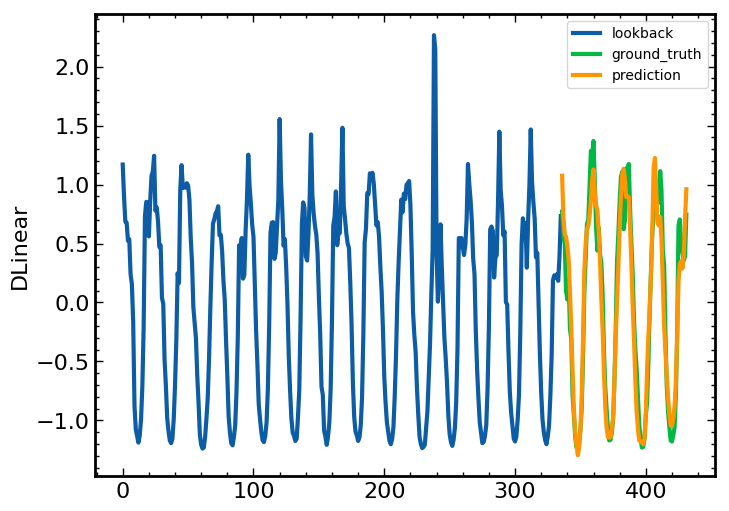

In [15]:
# from src.experiments.shortterm import DLinearForecast
from torch_timeseries.experiments import DLinearForecast

# exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Traffic')



### PAN

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
tensor([128, 204, 282, 358, 436, 512], dtype=torch.int32)
self.t_index [191, 239, 287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/Traffic/w336h1s96/9d50049aec59484582f3104e13addf53/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

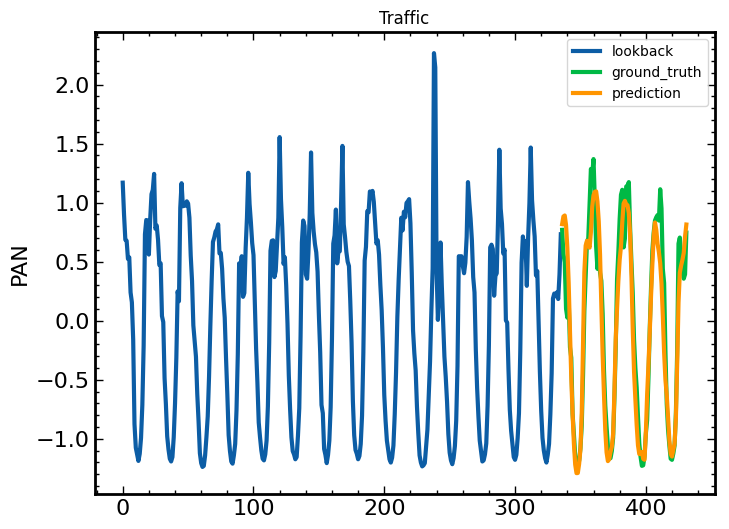

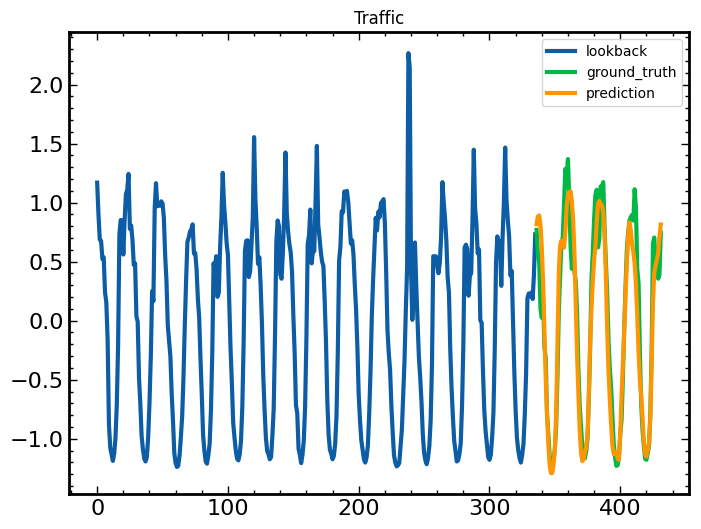

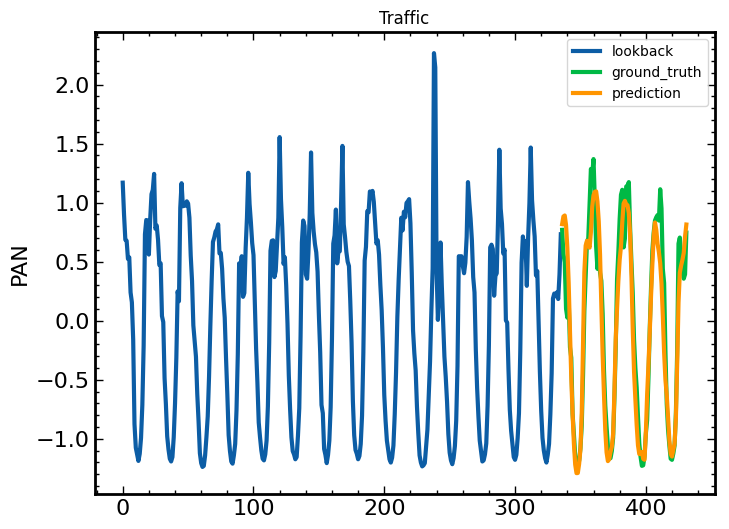

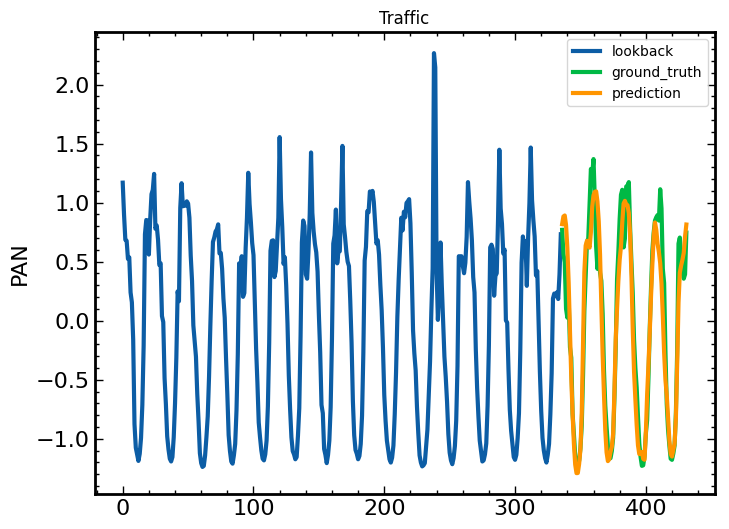

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [15]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset,patch_len=192, stride=48, start_d_model=128, end_d_model=512, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, 'Traffic', 'PAN')

# plt.show()
# plt.legend()


In [ ]:
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 6000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 200
# v = 200

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

### CATS

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic


train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/CATS/Traffic/w336h1s96/e27a5299d4ce685b7d08f24318d40341/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

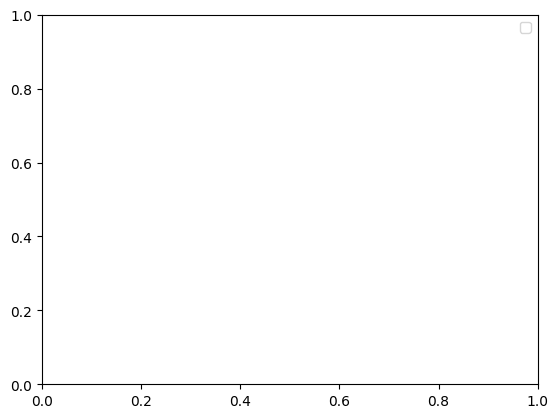

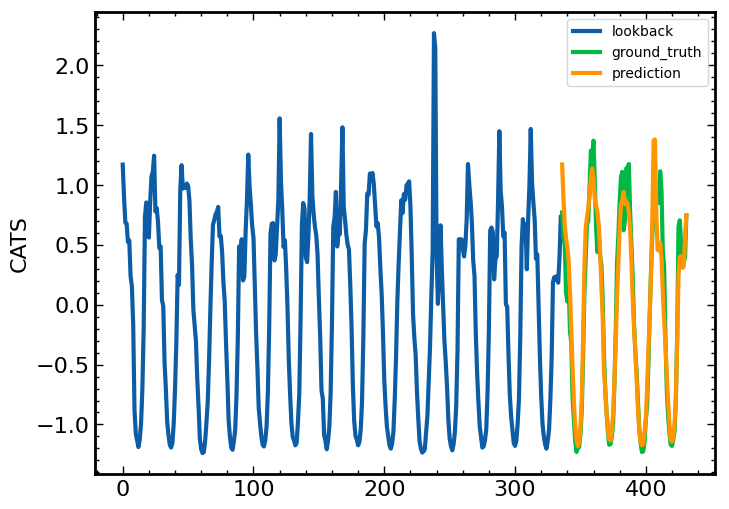

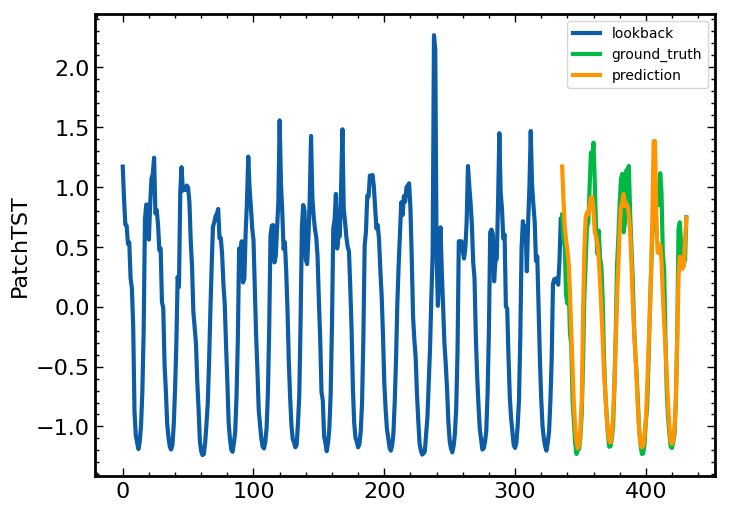

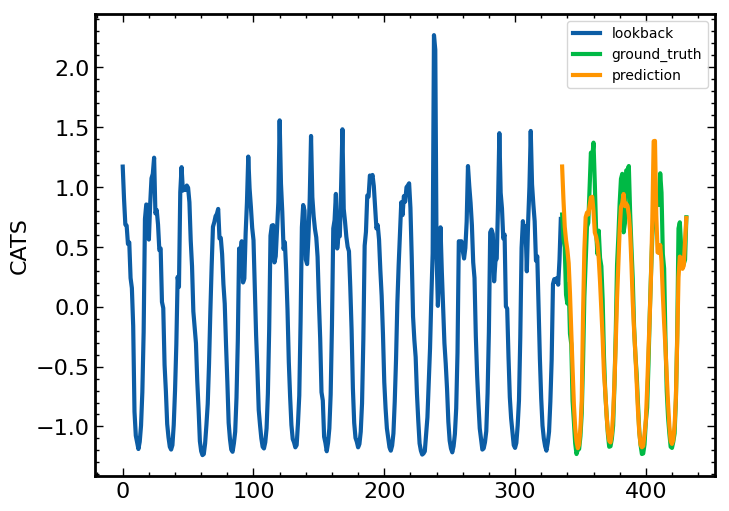

In [18]:
from torch_timeseries.experiments import CATSForecast

exp = CATSForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'CATS')

plt.show()
# plt.legend()


### PatchTST

In [17]:
from torch_timeseries.experiments import PatchTSTForecast

exp = CATSForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'PatchTST')

plt.show()
# plt.legend()


Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/CATS/Traffic/w336h1s96/e27a5299d4ce685b7d08f24318d40341/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

### iTransformer


Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/iTransformer/Traffic/w336h1s96/07ec929d12b8834cd9269a9d37b49532/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

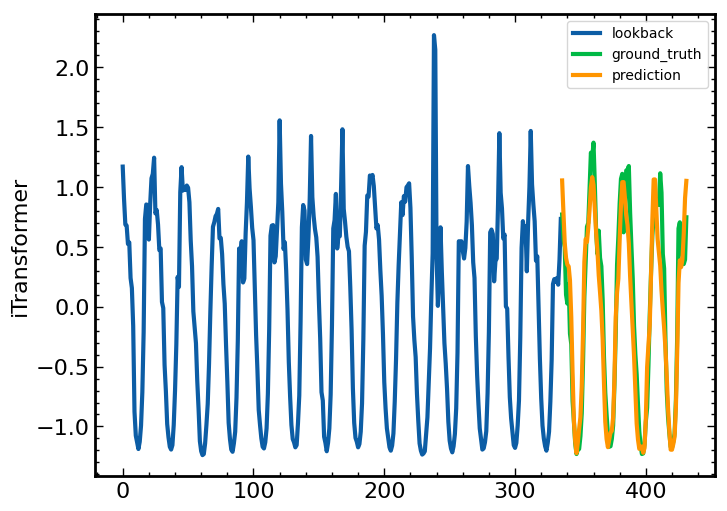

In [20]:
from torch_timeseries.experiments import iTransformerForecast

exp = iTransformerForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(3)
exp._resume_run(3)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'iTransformer')

plt.show()
# plt.legend()


### Crossformer

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/Crossformer/Traffic/w336h1s96/e1a23ddc302fcad185b29eaddfeb9d38/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

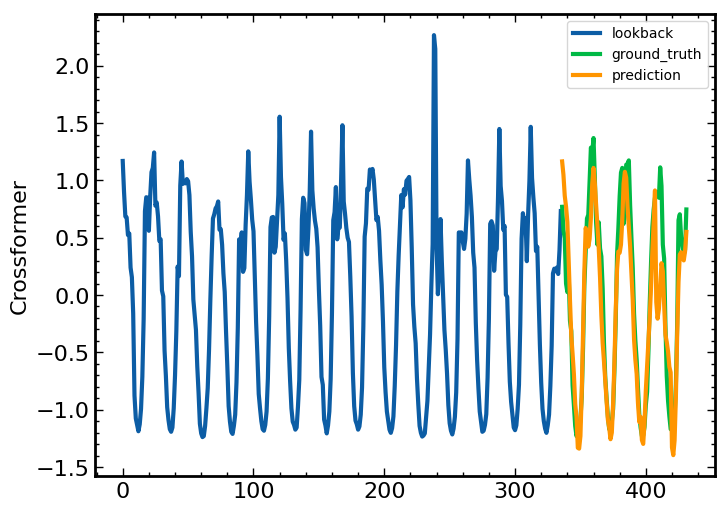

In [22]:
from torch_timeseries.experiments import CrossformerForecast

exp = CrossformerForecast(dataset_type=dataset, seg_len=12, win_size=2, d_model=64, d_ff=128, n_heads=4, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Crossformer')

plt.show()
# plt.legend()


## Electricity

In [23]:
dataset = "Electricity"
from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast

exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 6000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 200
# v = 200

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Electricity/w336h1s96/170bd6ba2dd7df8fb35dff1e89599ccb/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

### DLinear

In [24]:
# from src.experiments.shortterm import DLinearForecast
from torch_timeseries.experiments import DLinearForecast

# exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp = DLinearForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Traffic')



Using downloaded and verified file: /notebooks/4901_revisit_cdtran/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/DLinear/Electricity/w336h1s96/170bd6ba2dd7df8fb35dff1e89599ccb/run_checkpoint.pth


### Electricity

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv


train steps: 17981
val steps: 5165
test steps: 2537
tensor([128, 256, 384, 512], dtype=torch.int32)
self.t_index [287, 335, 383]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/Electricity/w336h1s96/0189e082242a7a3611c9730ed4e45fbe/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

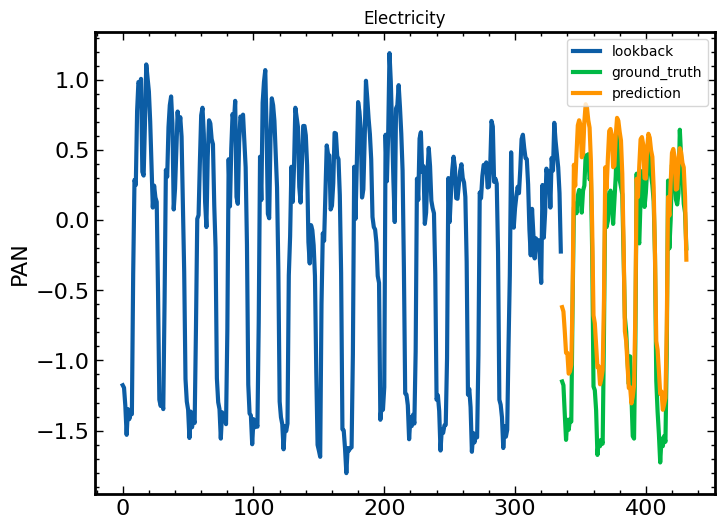

In [28]:
from src.experiments.CiDPG import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset,patch_len=288, stride=48, start_d_model=128, end_d_model=512, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, 'Electricity', 'PAN')

plt.show()
# plt.legend()


### CATS

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/CATS/Electricity/w336h1s96/8fc4bc0463450cbb17a11cb536164513/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

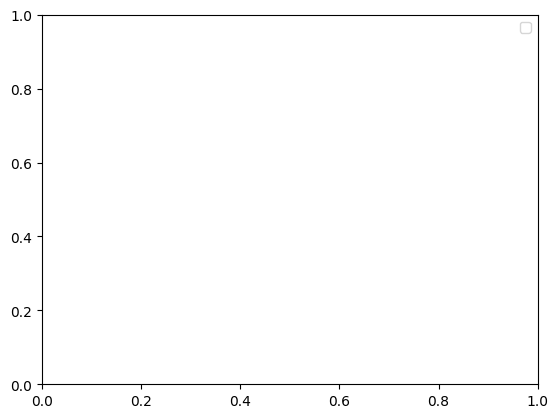

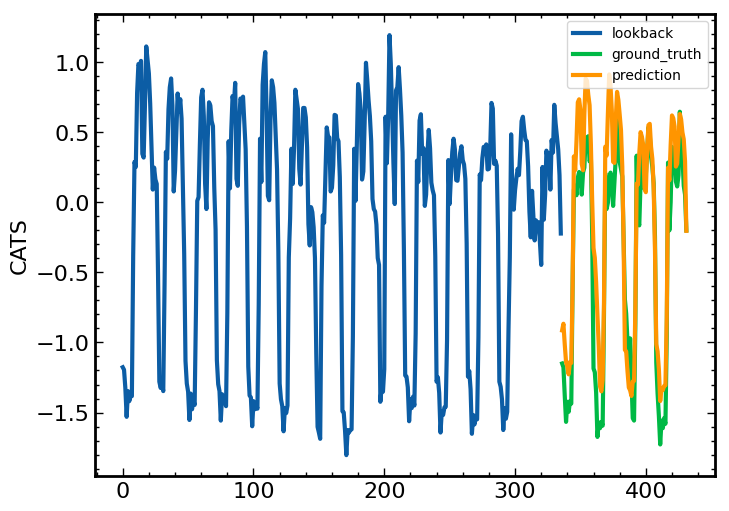

In [27]:
from torch_timeseries.experiments import CATSForecast

exp = CATSForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'CATS')

plt.show()
# plt.legend()


### PatchTST

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/CATS/Electricity/w336h1s96/8fc4bc0463450cbb17a11cb536164513/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

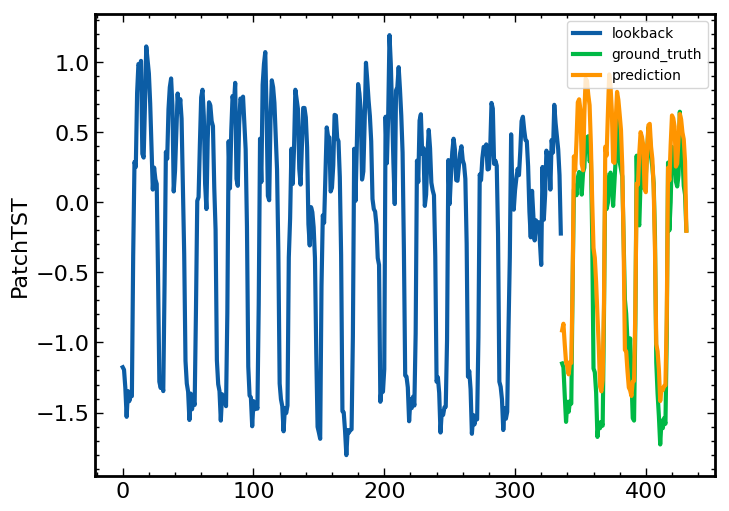

In [29]:
from torch_timeseries.experiments import PatchTSTForecast

exp = CATSForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'PatchTST')

plt.show()
# plt.legend()


### iTransformer

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/iTransformer/Electricity/w336h1s96/893ce048b9bbf66e55af17e926fe35f2/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

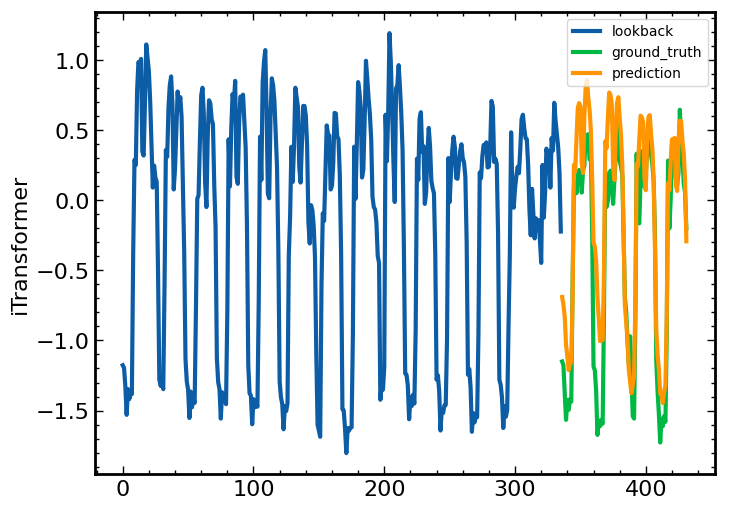

In [31]:
from torch_timeseries.experiments import iTransformerForecast

exp = iTransformerForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(3)
exp._resume_run(3)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'iTransformer')

plt.show()
# plt.legend()


### Crossformer

Using downloaded and verified file: /notebooks/pytorchtimseries/data/electricity/electricity.csv
train steps: 17981
val steps: 5165
test steps: 2537
resuming from /notebooks/pytorchtimseries/results/runs/Crossformer/Electricity/w336h1s96/787c9922ffb38c183e14299881b1a232/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

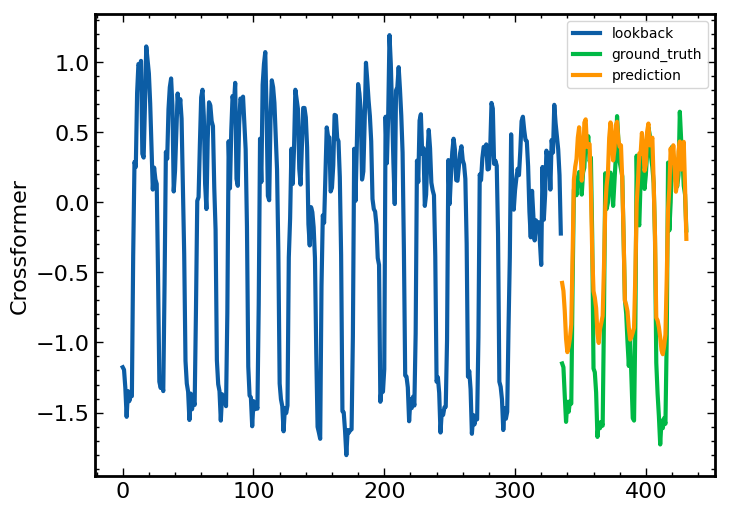

In [30]:
from torch_timeseries.experiments import CrossformerForecast

exp = CrossformerForecast(dataset_type=dataset, seg_len=12, win_size=2, d_model=64, d_ff=128, n_heads=4, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Crossformer')

plt.show()
# plt.legend()


## PEMS07

In [32]:
dataset= "PEMS07"

from src.experiments.shortterm import DLinearForecast

exp = DLinearForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 10 # usable v=0
i = 1000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 500

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/DLinear/PEMS07/w96h1s12/5a648c9e98547d7fbe0a27de6f836f8c/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

In [33]:

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Traffic')

plt.show()

NameError: name 'p' is not defined